# MLP Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset

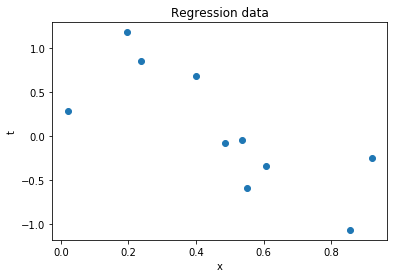

In [2]:
data = np.loadtxt('RegressionData.txt')

plt.plot(data[:,0], data[:,1,], 'o')
plt.xlabel("x"); plt.ylabel("t"); plt.title('Regression data'); plt.show()

### Implement MLP algorithm with one hidden layer of 3 neurons

In [3]:
def mlp(data, w10, w21, eta, epsilon, maxIteration):
    error = []
    j = 0
    while j < maxIteration:
    
        gw10 = np.zeros(w10.shape)
        gw21 = np.zeros(w21.shape)
        e = []
        y_last = []
        for i in range(data.shape[0]):
        # forward propagation
            xb = np.vstack(([1], data[i, 0]))
            h1 = np.dot(w10.T, xb)
            s1 = np.tanh(h1)
            s1b = np.vstack(([1], s1))
            y = np.dot(w21.T, s1b)
            y_last.append(y[0,0])
        # error
            err = ((y - data[i, 1])**2)/2
            e.append(err)
        # backpropagation
            d2 = y - data[i, 1]
            d1 = np.dot(w21[1::], d2)*(1. - np.tanh(h1)**2)
            D2 = np.dot(d2, s1b.T).T
            D1 = np.dot(d1, xb.T).T
            gw10 += D1
            gw21 += D2

        error.append(np.mean(e))
        w10 -= eta * gw10/data.shape[0]
        w21 -= eta * gw21/data.shape[0]
    
        if len(error)>1:
            if (np.abs(error[-1] - error[-2]))/error[-1] < epsilon:
                break
        j+=1
    return w10, w21, error, y_last

### Plot the error E over the iterations

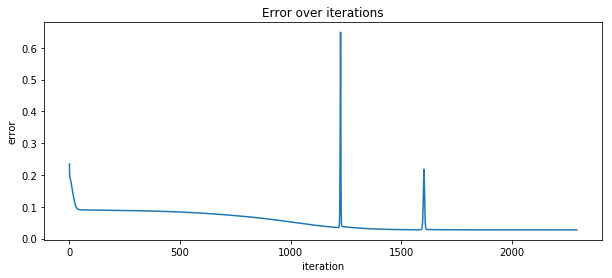

In [4]:
w10 = np.random.uniform(-0.5, 0.5, (2, 3))
w21 = np.random.uniform(-0.5, 0.5, 4).reshape((4,1))
w1, w2, error, lasty = mlp(data, w10, w21, 0.5, 1e-5, 3000)

plt.figure(figsize = (10,4))
plt.plot(error)
plt.xlabel('iteration'); plt.ylabel('error'); plt.title('Error over iterations'); plt.show()

### For the final network, plot the output of hidden units for all inputs

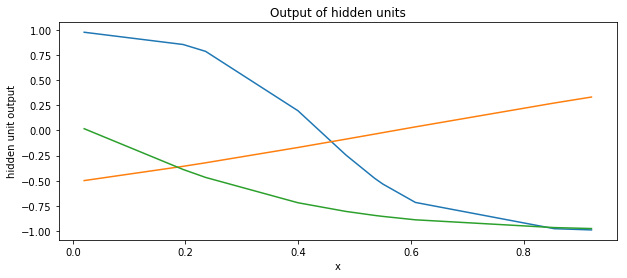

In [5]:
hiddenoutput = []
for i in range(data.shape[0]):
    x = np.vstack(([1], data[i, 0]))
    output = np.tanh(np.dot(w1.T, x))
    hiddenoutput.append(output)

plt.figure(figsize = (10,4))
plt.xlabel('x'); plt.ylabel('hidden unit output'); plt.title('Output of hidden units')
for i in range(3):
    h = np.zeros((data[:, 0].shape))
    for j in range(h.shape[0]):
        h[j] = hiddenoutput[j][i][0]
    inds = data[:, 0].argsort()
    sortedh = h[inds]
    plt.plot(data[:, 0][inds], h[inds])

### Plot the output values over the input space (i.e. the input-output function of the net- work) together with the training dataset.

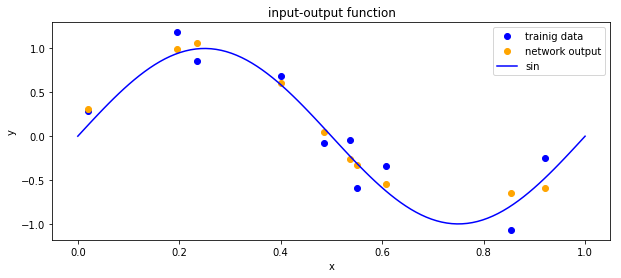

In [6]:
a = np.linspace(0, 1, 100)
plt.figure(figsize = (10,4))
plt.plot(data[:, 0], data[:, 1], 'o', color = 'blue', label = 'trainig data')
plt.plot(data[:, 0], lasty, 'o', color = 'orange', label = 'network output')
plt.plot(a, np.sin(2*np.pi*a), color = 'blue', label = 'sin')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.title('input-output function'); plt.show()

### Plot error, output of hidden layer and input-output fuction twice (i.e., for different initial conditions) next to each other and discuss: is there a difference, and if so, why?

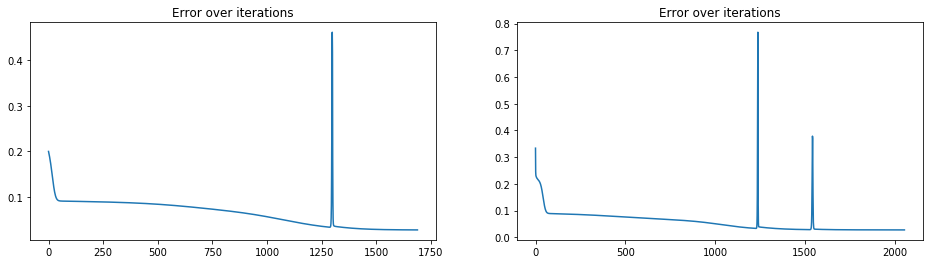

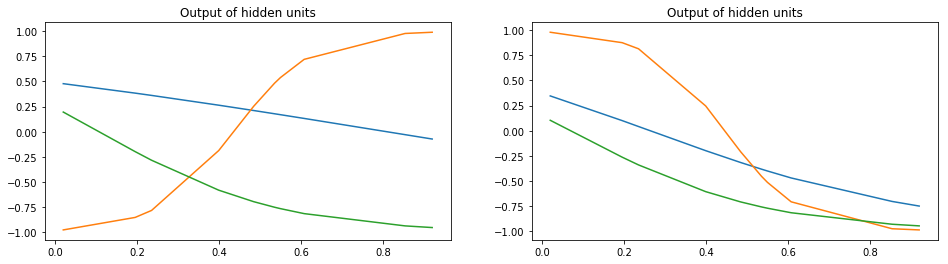

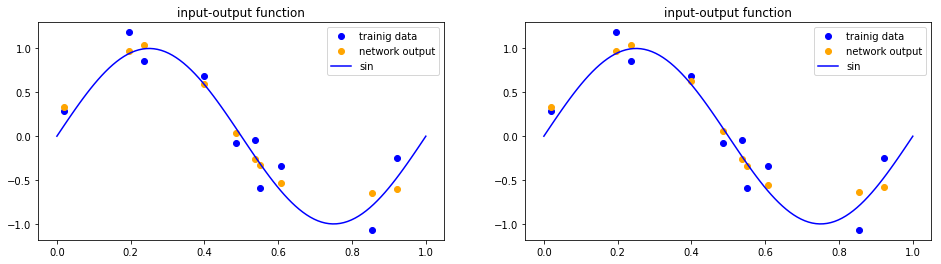

In [7]:
w10_1 = np.random.uniform(-0.5, 0.5, (2, 3))
w21_1 = np.random.uniform(-0.5, 0.5, 4).reshape((4,1))

w10_2 = np.random.uniform(-0.5, 0.5, (2, 3))
w21_2 = np.random.uniform(-0.5, 0.5, 4).reshape((4,1))

w1_1, w2_1, error_1, lasty_1 = mlp(data, w10_1, w21_1, 0.5, 1e-5, 3000)
w1_2, w2_2, error_2, lasty_2 = mlp(data, w10_2, w21_2, 0.5, 1e-5, 3000)

errors = [error_1, error_2]
fig, axes = plt.subplots(1, 2, figsize = (16,4))
for i in range(2):
    axes[i].plot(errors[i])
    axes[i].set_title('Error over iterations')
    
w = [w1_1, w1_2]
hiddenoutputs = []
for j in range(2):
    hiddenoutput = []
    for i in range(data.shape[0]):
        x = np.vstack(([1], data[i, 0]))
        output = np.tanh(np.dot(w[j].T, x))
        hiddenoutput.append(output)
    hiddenoutputs.append(hiddenoutput)
    
fig, axes = plt.subplots(1, 2, figsize = (16,4))
for k in range(2):
    for i in range(3):
        h = np.zeros((data[:, 0].shape))
        for j in range(h.shape[0]):
            h[j] = hiddenoutputs[k][j][i][0]
        inds = data[:, 0].argsort()
        sortedh = h[inds]
        axes[k].plot(data[:, 0][inds], h[inds])
    axes[k].set_title('Output of hidden units')
    
lastys = [lasty_1, lasty_2]
a = np.linspace(0, 1, 100)
fig, axes = plt.subplots(1, 2, figsize = (16,4))
for i in range(2):
    axes[i].plot(data[:, 0], data[:, 1], 'o', color = 'blue', label = 'trainig data')
    axes[i].plot(data[:, 0], lastys[i], 'o', color = 'orange', label = 'network output')
    axes[i].plot(a, np.sin(2*np.pi*a), color = 'blue', label = 'sin')
    axes[i].legend(); axes[i].set_title('input-output function')

There are differences because results depend on initial weights - algorithm converges to different local optima.